In [1]:
import os
loc1 = 'C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/lung_image_sets'
loc2 = 'C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/colon_image_sets'

In [2]:
import cv2
from tqdm import tqdm
features = []

for dir in os.listdir(loc1):
    sub_dir = os.path.join(loc1,dir)
    print(sub_dir)
    for img in tqdm(os.listdir(sub_dir)):
        f = cv2.imread(os.path.join(sub_dir , img))
        #f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
        f = cv2.resize(f , (100,100))
        features.append(f)
        
for dir in os.listdir(loc2):
    sub_dir = os.path.join(loc2,dir)
    print(sub_dir)
    for img in tqdm(os.listdir(sub_dir)):
        f = cv2.imread(os.path.join(sub_dir , img))
        #f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
        f = cv2.resize(f , (100,100))
        features.append(f)

C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/lung_image_sets\lung_aca


100%|██████████| 5000/5000 [01:06<00:00, 75.67it/s]


C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/lung_image_sets\lung_n


100%|██████████| 5000/5000 [01:03<00:00, 79.03it/s]


C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/lung_image_sets\lung_scc


100%|██████████| 5000/5000 [01:04<00:00, 77.08it/s]


C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/colon_image_sets\colon_aca


100%|██████████| 5000/5000 [01:05<00:00, 76.89it/s]


C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/colon_image_sets\colon_n


100%|██████████| 5000/5000 [01:02<00:00, 79.67it/s]


In [3]:
import numpy as np
X = np.array(features)
print(X.shape)

(25000, 100, 100, 3)


In [4]:
labels = []
i = 0

for dir in os.listdir(loc1):
    sub_dir = os.path.join(loc1,dir)
    print(sub_dir)
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1
    
for dir in os.listdir(loc2):
    sub_dir = os.path.join(loc2,dir)
    print(sub_dir)
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1
    

C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/lung_image_sets\lung_aca


100%|██████████| 5000/5000 [00:00<00:00, 5009918.78it/s]


C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/lung_image_sets\lung_n


100%|██████████| 5000/5000 [00:00<00:00, 5005136.04it/s]


C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/lung_image_sets\lung_scc


100%|██████████| 5000/5000 [00:00<00:00, 4986096.05it/s]


C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/colon_image_sets\colon_aca


100%|██████████| 5000/5000 [00:00<00:00, 1669308.29it/s]


C://Users/nidhi/OneDrive/Desktop/lungdataset/lung_colon_image_set/colon_image_sets\colon_n


100%|██████████| 5000/5000 [00:00<00:00, 2506755.92it/s]


In [5]:
Y = np.array(labels)
print(Y.shape)
print(np.unique(Y))

(25000,)
[0 1 2 3 4]


In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(18750, 100, 100, 3) (18750,) (6250, 100, 100, 3) (6250,)


In [8]:
xtrain = xtrain.astype('float32' )
xtest = xtest.astype( 'float32' )


In [9]:
xtrain = xtrain/xtrain.max()
xtest = xtest/xtest.max()

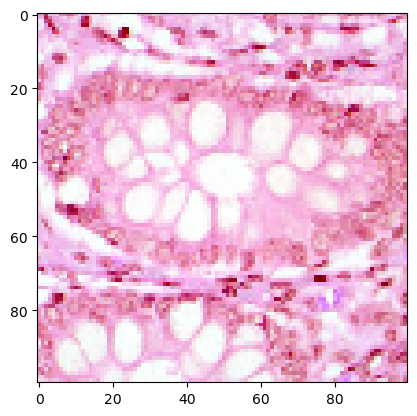

In [10]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[5600])
plt.show()

In [11]:
import tensorflow as tf
ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score


def create_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3), input_shape=(100,100,3),activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))

    model.add(Conv2D(64,(3,3), input_shape=(100,100,3),activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))

    model.add(Conv2D(128,(3,3), input_shape=(100,100,3),activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))

    model.add(Flatten())

    model.add(Dense(248, activation= 'relu' ))
    model.add(Dense(5, activation= 'softmax' ))

    return model

num_models = 5
models = []
for _ in range(num_models):
    model = create_model()
    model.compile(optimizer=Adam() , loss='categorical_crossentropy', metrics=['accuracy'])
    models.append(model)
 
history = []
for model in models:
    hist = model.fit(xtrain, ytrain, epochs=20, batch_size=100)
    history.append(hist)
    
predictions = []       
for model in models:
    predictions.append(model.predict(xtest))

ensemble_predictions = np.mean(predictions, axis=0)
ensemble_labels = np.argmax(ensemble_predictions, axis=1)



Epoch 1/20
188/188 [==============================] - 58s 308ms/step - loss: 0.7833 - accuracy: 0.6595
Epoch 2/20
188/188 [==============================] - 56s 299ms/step - loss: 0.4136 - accuracy: 0.8164
Epoch 3/20
188/188 [==============================] - 55s 290ms/step - loss: 0.3011 - accuracy: 0.8754
Epoch 4/20
188/188 [==============================] - 53s 283ms/step - loss: 0.2132 - accuracy: 0.9158
Epoch 5/20
188/188 [==============================] - 55s 290ms/step - loss: 0.1707 - accuracy: 0.9325
Epoch 6/20
188/188 [==============================] - 58s 309ms/step - loss: 0.1524 - accuracy: 0.9405
Epoch 7/20
188/188 [==============================] - 58s 308ms/step - loss: 0.1339 - accuracy: 0.9476
Epoch 8/20
188/188 [==============================] - 61s 326ms/step - loss: 0.1136 - accuracy: 0.9557
Epoch 9/20
188/188 [==============================] - 58s 307ms/step - loss: 0.0992 - accuracy: 0.9621
Epoch 10/20
188/188 [==============================] - 56s 298ms/step - l

188/188 [==============================] - 54s 288ms/step - loss: 0.0296 - accuracy: 0.9900
Epoch 1/20
188/188 [==============================] - 54s 284ms/step - loss: 0.7130 - accuracy: 0.6860
Epoch 2/20
188/188 [==============================] - 56s 296ms/step - loss: 0.4472 - accuracy: 0.8021
Epoch 3/20
188/188 [==============================] - 52s 279ms/step - loss: 0.2941 - accuracy: 0.8782
Epoch 4/20
188/188 [==============================] - 52s 277ms/step - loss: 0.2402 - accuracy: 0.9034
Epoch 5/20
188/188 [==============================] - 52s 277ms/step - loss: 0.1770 - accuracy: 0.9310
Epoch 6/20
188/188 [==============================] - 53s 281ms/step - loss: 0.1452 - accuracy: 0.9431
Epoch 7/20
188/188 [==============================] - 55s 293ms/step - loss: 0.1222 - accuracy: 0.9527
Epoch 8/20
188/188 [==============================] - 54s 286ms/step - loss: 0.1164 - accuracy: 0.9562
Epoch 9/20
188/188 [==============================] - 54s 287ms/step - loss: 0.1091 

In [16]:
test_labels_multiclass = np.argmax(ytest, axis=1)
accuracy = accuracy_score(test_labels_multiclass, ensemble_labels)
print("Ensemble Accuracy:", accuracy)


Ensemble Accuracy: 0.98288


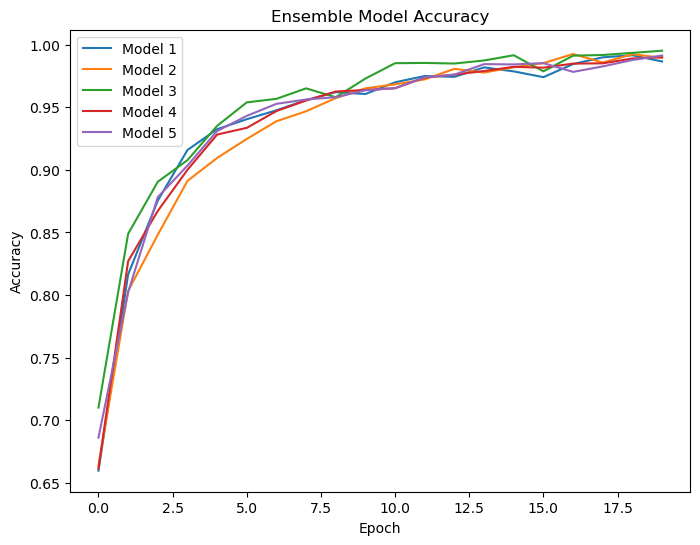

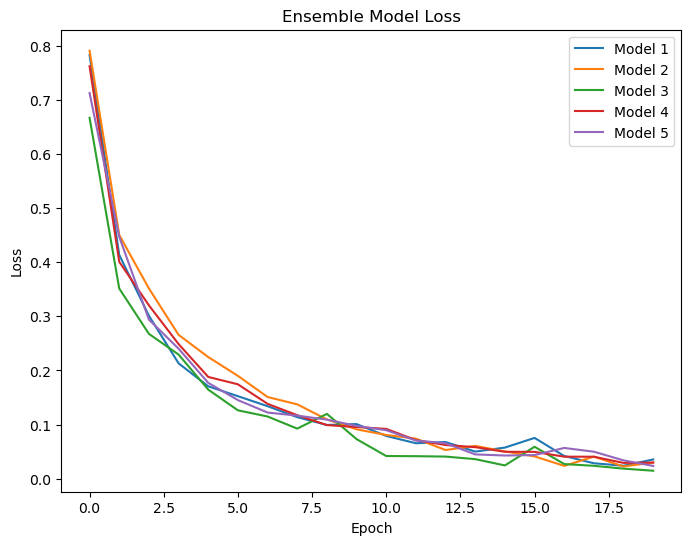

In [17]:

# Plot accuracy during training
plt.figure(figsize=(8, 6))
for i, hist in enumerate(history):
    plt.plot(hist.history['accuracy'], label='Model {}'.format(i+1))
plt.title('Ensemble Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss during training
plt.figure(figsize=(8, 6))
for i, hist in enumerate(history):
    plt.plot(hist.history['loss'], label='Model {}'.format(i+1))
plt.title('Ensemble Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()